In [77]:
import csv
from datasets import load_dataset

original_dataset = load_dataset("potsawee/wiki_bio_gpt3_hallucination")
original_dataset

DatasetDict({
    evaluation: Dataset({
        features: ['gpt3_text', 'wiki_bio_text', 'gpt3_sentences', 'annotation', 'wiki_bio_test_idx', 'gpt3_text_samples'],
        num_rows: 238
    })
})

In [78]:
# Rewrite labels function
def rewrite_labels(original_label):
    if original_label == 'accurate':
        return 3
    elif original_label == 'minor_inaccurate':
        return 1
    elif original_label == 'major_inaccurate':
        return 0
    else:
        return None  # Handle other cases as needed

In [87]:
qid = []
ans = []
labels = []

# Iterate over each passage and its corresponding label
for i, (passage, original_label) in enumerate(zip(original_dataset['evaluation']['gpt3_sentences'], original_dataset['evaluation']['annotation'])):
    sentences = passage
    
    # Check for mismatch in the number of sentences and labels
    if len(sentences) != len(original_label):
        print(f"Mismatch at index {i}: Sentences - {len(sentences)}, Labels - {len(original_label)}")
        
    # Rewrite labels
    rewritten_labels = [rewrite_labels(label) for label in original_label]
    
    qid.extend([i for sentence in sentences])
    ans.extend(sentences)
    labels.extend(rewritten_labels)

In [89]:
print(len(ans))
print(len(labels))
print(len(qid))

1908
1908
1908


In [92]:
data = list(zip(qid, ans, labels))
csv_file_path = "./data/generated/selfcheckgpt.csv"

with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['qid', 'ans', 'label'])
    
    # Write the data
    writer.writerows(data)

print(f"CSV file has been created at {csv_file_path}")

CSV file has been created at ./data/generated/selfcheckgpt.csv


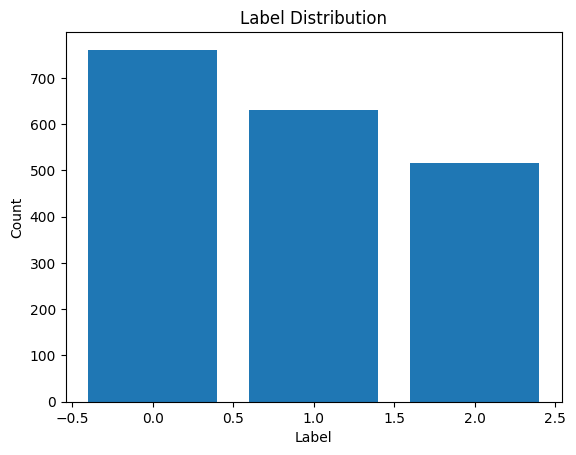

In [93]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = Counter(labels)

# Plot the distribution
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()